# Differentiating Between Two Opposing Reddits

By: Christopher Kuzemka: [Github Repository](https://git.generalassemb.ly/chriskuz/project_3)

## Problem Statement

My girlfirned loves to use Reddit. One of her favorite subreddits is "[r/aww]"(https://www.reddit.com/r/aww/), a community dedicated forum largely consisting of cute animals and cute moments captured on video and on camera. However, there is another reddit that is the complete opposite of cute animals and cute moments captured on video and on camera -- this subreddit is known as "[r/natureismetal]"(https://www.reddit.com/r/natureismetal) -- and it was merged together with "r/aww" to create a "super-subreddit" known as "r/dangerouslycute." The official reason for doing so is unknown, but the top rumor for the merger narrates that both moderators from each subreddit felt that they had enough of a mutual following to justify the merge and consolidate all posts together. This made my girlfriend very upset, as she was never a fan of the content from "r/natureismetal" and now she is tainted by its controversial content. We can also imagine that many others must also feel the same way about the merge. 

As a good data scientist who wishes to make his significant other happy, I have decided to help her make an app that will run Javascript in the background with Reddit and ultimately separate the consolidated subreddit content. She will be writing all other code necessary to create the app, while we will explore the jumbled data of "r/dangerouslycute" and help create the model that will separate the two subreddits from this super-subreddit.

Using data collected previously from the subreddits before the merge, we are going to utilize Natural Language Processing classification models to separate the subreddit content. Our supervised learning models will be judged by their accuracy measure for success. We will do an in depth analysis on a successful model and explore the various quirks behind the influences of its predictions.

## Executive Summary

 

## Table of Contents
[1.00 Data Loading](#1.00-Data-Loading)

[2.00 Data Cleaning and Analysis](#2.00-Data-Cleaning-and-Moderate-Analysis)

- [2.01 Quick Check](#2.01-Quick-Check)

- [2.02 Data Documentation Exploration](#2.02-Data-Documentation-Exploration)

- [2.03 Cleaning](#2.03-Cleaning)

- [2.04 Feature Engineering](#2.04-Feature-Engineering)

- [2.05 Dummifying Columns](#2.05-Dummifying-Columns)

- [2.06 Exploratory Data Analysis and Visualization](#2.06-Exploratory-Data-Analysis-and-Visualization)

[3.00 Machine Learning Modeling and Visulalization](#3.00-Machine-Learning-Modeling-and-Visulalization)

- [3.01 Model Preparation](#3.01-Model-Preparation)

- [3.02 Modeling](#3.02-Modeling)

- [3.03 Model Selection](#3.03-Model-Selection)

- [3.04 Model Evaluation](#3.04-Model-Evaluation)

[4.00 Conclusions](#4.00-Conclusions)

[5.00 Sources and References](#5.00-Sources-and-References)



# 1.00 Data Loading

### Package Import

In [92]:
import pandas as pd #imports pandas library
import numpy as np #imports numpy library

import matplotlib.pyplot as plt #imports matplotlib.pyplot library
import seaborn as sns #imports seaborn library

from sklearn.model_selection import train_test_split, GridSearchCV #imports data splitting for modeling
from sklearn.preprocessing import StandardScaler #imports the StandardScaler metirc
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin # this allows us to create a custom transformer

from nltk.corpus import stopwords

import copy as cp #imports sophisticated dataframe copying library

### Loading The Data

In [8]:
dangerouslycute_data = pd.read_csv('../data/dangerouslycute_data.csv') #reads in the initial dataframe 

# 2.00 Data Cleaning and Analysis 

## 2.01 Quick Check

In [9]:
dangerouslycute_data.head() #displays the head of the data

,Unnamed: 0,index,title,selftext,subreddit,created_utc,author,num_comments,score,is_self,over_18,author_flair_text,total_awards_received,timestamp
0,0,0,Huge Grizzly Bear,NaN,natureismetal,1584925587,cobrakiller2000,198,1,False,False,NaN,0,2020-03-22
1,1,1,In my kitchen houseplant..,NaN,natureismetal,1584929238,Bronco7771,2,1,False,False,NaN,0,2020-03-22
2,2,2,In my kitchen houseplant..,NaN,natureismetal,1584929255,Bronco7771,2,1,False,False,NaN,0,2020-03-22
3,3,3,Deathlock,NaN,natureismetal,1584931304,Hamstah_Huey,1,1,False,False,NaN,0,2020-03-22
4,4,4,Seal eats an octopus,NaN,natureismetal,1584940215,huntergill123,231,1,False,False,NaN,0,2020-03-23


We see the first 5 rows of the dataframe displayed above to showcase how our data elements will typically look.  

In [11]:
dangerouslycute_data.tail()

,Unnamed: 0,index,title,selftext,subreddit,created_utc,author,num_comments,score,is_self,over_18,author_flair_text,total_awards_received,timestamp
4995,2495,495,This picture cracks me up every time.,NaN,aww,1574575629,bjax_7,68,1,False,False,NaN,0,2019-11-24
4996,2496,496,Please take me,NaN,aww,1574575720,side_effect7,1,1,False,False,NaN,0,2019-11-24
4997,2497,497,Made me tear up,NaN,aww,1574575767,ancientflowers,0,1,False,False,NaN,0,2019-11-24
4998,2498,498,"Husband: ""We're not getting a cat!"" Husband an...",NaN,aww,1574575820,sleepingdragon80,10,1,False,False,NaN,0,2019-11-24
4999,2499,499,Micio got angry because I poked him in his ponch.,NaN,aww,1574575826,CartonOfPutters,3,1,False,False,NaN,0,2019-11-24


We see the last 5 rows of the dataframe displayed above to showcase how our data elements will typically look. 

In [21]:
dangerouslycute_data.shape #outputs the shape of the dataframe
print("The dataframe is 5000 rows long and has 13 columns.") #prints the observed output of the dataframe

The dataframe is 5000 rows long and has 13 columns.


In [16]:
dangerouslycute_data.isnull().mean().sort_values(ascending = False)

author_flair_text        0.9982
selftext                 0.9894
timestamp                0.0000
total_awards_received    0.0000
over_18                  0.0000
is_self                  0.0000
score                    0.0000
num_comments             0.0000
author                   0.0000
created_utc              0.0000
subreddit                0.0000
title                    0.0000
index                    0.0000
Unnamed: 0               0.0000
dtype: float64

In [18]:
dangerouslycute_data.isnull().sum().sort_values(ascending = False)

author_flair_text        4991
selftext                 4947
timestamp                   0
total_awards_received       0
over_18                     0
is_self                     0
score                       0
num_comments                0
author                      0
created_utc                 0
subreddit                   0
title                       0
index                       0
Unnamed: 0                  0
dtype: int64

In [19]:
dangerouslycute_data.dtypes

Unnamed: 0                int64
index                     int64
title                    object
selftext                 object
subreddit                object
created_utc               int64
author                   object
num_comments              int64
score                     int64
is_self                    bool
over_18                    bool
author_flair_text        object
total_awards_received     int64
timestamp                object
dtype: object

From the above quick checks of the dataframe, we are able to point out a few observations that will need to be dealt with in the data cleaning process. Some columns worth noting are mentioned below:

- `Unnamed: 0` (Unecessary index column providing no useful gaining infomration.)
- `index` (The dataframe already comes with an index so this column is redundant by nature.)
- `author_flair_text` (Majority of this column is null. We may still want to use this. Will groupby subreddit to explore further.)
- `selftext` (Majority of this column is null. We may want to use this. Will groupby subreddit to explore further.)

We will be utilizing Natural Language Processing models to evaluate our subreddits. A strong majority of these models will function appropriately using textual data instead of numeric data. Methods exist where numeric data can be considered into the modeling processes, but using such data will be considered a "judgement call" on the modeling aspect. We can rather use such numeric data to get a better understanding of certain subreddit trends. 

## 2.02 Data Documentation, Exploration and History

### You Must Know the Reddit Lingo

Before we continue further with our study, let's take some time to discuss some of the language of Reddit and ultimately understand its platform. Upon its first observation, the culture of Reddit may be rather difficult to interpret. Fortunately for us, I am an active Reddit user who has been addicted to the platform for over 3 years. Much of any relevant information I will discuss here will be accurate enough for our understanding of this dataframe. 

Reddit is a social media platform constructed of many communities sharing common and niche interests. [A quick Google search](https://www.google.com/search?client=safari&rls=en&q=when+did+reddit+begin&ie=UTF-8&oe=UTF-8) reveals that Reddit was originally created in 2005 by developers [Alexis Ohanian AKA u/kn0thing, Steve Huffman AKA u/spez, Chris Slowe AKA u/KeyserSosa, & Aaron Swartz](https://www.reddit.com/r/AskReddit/comments/21875u/what_happend_with_the_guys_who_created_reddit_are/).Notice that after I just referenced each name for most of the founders, a username was provided respectively associated with each founder -- notice the prefix "u" in "u/insert_username_here". This "u" mentioned before a name indicates a Reddit username and will be found often in our `author` column from our dataframe. 

Reddit follows a similar naming convention when it comes to its sub communities (also known as subreddits). For instance, "r/dangerouslycute", the problematic subreddit we are analyzing in this study, has a prefix "r" in front of its community name. This prefix instantiates the subreddit community path. A subreddit is a forum where users are able to discuss topics and make submissions relevant to the subreddit's guidelines and interests. These subreddits will typically have moderators and automoderators which scrutinize all posts being posted on the subreddit to ensure submissions are inline with the community's set rules and guidelines. This method of scrutify acts as a "judicial system" to help a subreddit thrive in its own collective image. Analyzing the subreddits rules and guidelines will be useful to pay attention to when understanding the content found in our dataframe. 

A submission may be commented on, be rated by score for its popularity, and even receive virtual awards provided by the community. These are all good indicators to determine the ultimate popularity of a submission respective to its own subreddit. Very often, a more popular post will be more inline with the subreddit's collective image. 

### How The Data Was Gathered

*To have a deeper picture of how the data was obtained, it would be best and most recommended to explore the `data_scrape.ipynb` file in the `code` directory of this repository. For convenience, much of the information posted within this referenced notebook is shown here to explain how the data was gathered.*

*The below is directly referenced in `data_scrape.ipynb` -- the original place of where this narrative was created.*

#### The API
Thanks to Reddit's semi-relaxed platform and conditions of data scraping, [sourced here in their robots.txt path](https://www.reddit.com/robots.txt), we are able to successfully obtain various data to help us create a model that answers our problem statement. While in reality, there is no actual subreddit known as "r/dangerouslycute" to actually obtain the jumbled data which my girlfriend is complaining about, we are able to simulate this dataframe conundrum by pulling data from the two original subreddits whose content were merged together: "r/natureismetal" and "r/aww." Upon pulling both sets of data from the subreddits, we can then combine them to create one large dataframe to work with.  

The most easy way of doing this without needing to go through an arduous web-scraping process of navigating ugly HTML is by utilizing an API. APIs are tools made by website developers and/or data-enthusiastic communities which help users (such as ourselves) access features to software. Some APIs are sophisticated enough to allow full modding support for certain software applications. In this case, we are going to use a web API known as [pushshift](https://pushshift.io) to obtain information from Reddit's different communities. Pushshift is a [community generated API originally made by moderators from "r/datasets"](https://github.com/pushshift/api). Its documentation is found in both related pushshift hyperlink sources found within this very paragraph. It is very sophisticated and very useful in quickly obtaining data in json key-value pairs which can be readily parsed through in Python. 

The API has the capability of pulling in data from two main pathways. One pathway searches through reddit submissions (mainly including posts) while the other pathway searches through comments. For this study, we are only going to go through Reddit submissions to help us gather our data for our model. The Reddit submission pathway through the API contains a lot of other accessible data, including the author name of the post, popularity of the post as whole, and more. As a frequent Reddit user and commentater, I personally can vouch for why it may not be wise to use comments as a method for creating a model. The general understanding to remember is this: *posts on reddit go through bot moderated scruitiny, whereas comments do not*. To elaborate, each successful subreddit will have strict guidelines and rules for submitting content relevant to the "sub" and will often have a very dedicated team of moderators who oversee that these rules are followed to the best of everyone's abilities. These rules allow the majority of submitted content to stay relevant to the community's interests and stay relevant to the subreddit's purpose. Comments are typically more plentiful than submissions and are often overlooked by moderators. Comments as an entity are always left open to interpretation and do not undergo as much scrutiny as posts do. This allows commentators to write narratives that may go on complete tangents from the original context of the submission -- solely in the spirit of online discussion. As a reuslt, we may find examples of people talking about their favorite movies or foods on subreddits only discussing how cute cats are.

The next step was to consider which features were going to be important to understand for our model. Using the API's documentation, we decided on these features below to make any necessary data cleanup later on easier for us. The list of features which were thought to be relevant for our model are:

- `title` (title of the submission)
- `selftext` (text of post submission )
-  `subreddit` (name of the submission's associated subreddit)
- `created_utc` (time stamp of submission)
- `author` (name of the submission author)
- `num_comments` (number of comments with the submission)
- `score` (aggregated score of the submission incorporating the difference of upvotes and downvotes)
-  `is_self` (boolean to determine if the submission is solely text post)
-  `over_18` (boolean to determine if content is NSFW)
- `author_flair_text` (flair text native to the author when posting on a specific subreddit)
- `total_awards_received` (number of awards received)

#### Why These Features?
These features were thought out and chosen out of the plethora of features we could pull because of their possible predictive ability to create our model. Below is a quick list of reasoning behind each variable's selection:

- `title` (necessary to determine titular key words)
- `selftext` (useful to find any key words to be added to our NLP modeling)
- `subreddit` (our prediction values)
- `created_utc` (verifies the uniqueness of data)
- `author` (may be useful in determining user interest per subreddit)
- `num_comments` (useful to find popular submissions within a subreddit)
- `score` (useful in determining the validity of a post to a subreddit by its popularity)
- `is_self` (useful in identifying posts with added text)
- `over_18` (boolean to determine if content is NSFW)
- `author_flair_text` (may be useful is finding relevant text related to a subreddit per author)
- `total_awards_received` (useful in understanding a post's weight on the subreddit)

### r/aww's Image
-----------------------------------------------------

#### r/aww's Size

As of April 22nd, 2020 at 11:10 P.M. ETC, the member size of r/aww is 24,469,289 users with 34,038 users online currently.
  
-----------------------------------------------------

#### r/aww's About

"*Things that make you go AWW! Like puppies, bunnies, babies, and so on... A place for really cute pictures and videos!*"

-----------------------------------------------------

#### r/aww's Rules & Guidelines

*1) No "sad" content*
- *No "sad" content, such as pics of animals that have passed away (try /r/petloss), animals that have been injured/abused, or sob stories (e.g. found him in a dumpster, finding abandoned animals, sick/survived cancer).*

*2) No captioned pictures/videos*
- *No comics, captioned pictures/videos (try /r/lolcats, r/cute, or /r/animaltextgifs), or photos of just text. No memes or snapchat captions.*

*3) No asking for upvotes or approval*
- *No post titles asking for upvotes or approval, such as "any love for...", "what does /r/aww think of...", or "this didn't get much love on...", or "karma machine", "sort by new", "don't scroll past", "not your typical aww", "r/aww needs more \[X\] animals".*

*4) No harassment*
- *No slurs or harassing comments.*

*5) Posts must link to sites on our approved list*
- *No posts with links to sites not on the approved list.*

*6) No NSFW content*
- *This includes not only inappropriate images but also inappropriate text, innuendo, or inappropriate jokes in comments. No comments about how dangerous certain domesticated breeds are, or about eating the animals in the post.*

*7) No asking for donations or adoptions*
- *No asking for donations, sponsorship or adoptions (try /r/care or /r/assistance).*

*8) No bots or bot-like behaviour*
- *No bots or bot-like behaviour. This includes copypasting titles and/or comments, or generally acting like a script/bot. No flooding (more than 4 posts in a 24 hour period).*

*9) No lying about ownership*
- *No false claims of content ownership.*

*10) No social media*
- *No links to social media content, whether in comments, submissions, image/video descriptions (including imgur gallery descriptions for direct links), or as superimposed text in an image. Handles are okay in comments as long as they're not links.*

[Source](https://www.reddit.com/r/aww/wiki/index)

### r/natureismetal's Image

-----------------------------------------------------

#### r/natureismetal's Size

As of April 22nd, 2020 at 11:10 P.M. ETC, the member size of r/aww is 1,469,418 users with 2,942 users online currently.
  
-----------------------------------------------------

#### r/natureismetal's About

"*Badass pictures, gifs and videos of the awesome true brutality of nature*"

-----------------------------------------------------

#### r/natureismetal Rules & Guidelines

*1) Human Involvement*
- *Animals hurting/attacking humans is okay. Humans harming or killing animals is not allowed. No intentional human orchestrated interaction: this includes organized animal fighting and people feeding or baiting animals. This rule also includes animals being harmed at the hands of artificial objects (cars, fences, powerlines etc).
For humans being metal, check out r/HumansAreMetal.*

*2) Non-Descriptive Title*
- *Posts with titles that don't accurately describe the content or are purposefully misleading may be removed. Identify the animals/plants/content present in your title. Low effort titles such as 'X is metal!' may be removed. We don't allow 'I see you and I raise you' titles.*

*3) Reposts*
- *Any content previously posted within the last 120 days to r/natureismetal will be removed.
No submissions allowed from the NiM Top 50.
No submissions from the NiM Hall of Fame or the NiM Hall of Shame.
Reposting will be adjudicated on a 3 strikes policy. (1: warning, 2: temp ban, 3: permenant ban)
Word-for-word reposts will be removed.*

*4) Animals in Captivity*
- *No posting of zoo animals, domestic pets, animals in laboratories, circuses, hunting preserves, show business, feral cats and dogs, and alligator/crocodile wrangling. Farm animals and non-mammalian aquarium animals are allowed provided there is no human instigated feeding, baiting or violence. Anyone posting organized animal fighting will be banned permanently.*

*5) Non-Animal Content*
- *Acts of nature are allowed provided the content is metal. Posts must feature something nature related.*

*6) NSFW Tags*
- *Tag bloody or gory submissions as NSFW. If a mod tags your submission NSFW do not untag it. Posts involving human gore should be tagged NSFW and marked with the Humans Remains (NSFL) post flair.*

*7) No Click Bait or Shit Posts*
- *Seriously. We will kill you.*

*8) Animal Remains*
- *No images of piles of feathers or blood and guts. Remains must have some metal factor to them. Bad ass skeletons and skulls are allowed.
Human Remains are allowed only under the following conditions:
Damage seen in the submission must have been caused by animals and animals only. No other forms of nature or disease are allowed. Any submission must be fully marked with both NSFW and Human Remains (NSFL) flair or the submission will be removed. Repeated violations may result in a ban.*

[Source](https://www.reddit.com/r/natureismetal/submit)

### Takeaways

With both subreddit rules and guidelines displayed above, we can immediately see the controversy in the merge for r/dangerouslycute. Each subreddit's restrictions are vastly different and we can infer how r/natureismetal's graphic content simply does not fit with r/aww's content (not to also mention the lack of political correctness in r/natureismetal's rules and guidelines). 

From the rules and guidelines, we can begin to look for certain instances where we might see helpful features to incorporate into our predictions:


|__r/aww Rule__|__r/natureismetal Rule__|__Highlighted Takeaway__|
|---|---|---|
|Rule 1|Rule 1 & Rule 8|*Clear polarity between accepted subreddit content*|
|Rule 6|Rule 6|*Clear polarity between accepted subreddit content*|
|Rule 3|Rule 2|*r/natureismetal requires that titles are descriptive whereas r/aww has a different restriction in post titles.*|


## 2.03 Data Cleaning 

### Dropping Unecessary Columns

In [23]:
dangerouslycute_data.drop(columns = ['index', 'Unnamed: 0'], inplace = True) #drops columns 

### Renaming Columns To Be Human Readable

In [41]:
columns_dict = {
    "selftext": "post_subtext",
    "created_utc": "reddit_creation_identifier",
    "num_comments": "number_of_comments",
    "is_self": "text_in_post",
    "over_18": "nsfw",
} #naming dictionary to rename certain columns
dangerouslycute_data.rename(columns = columns_dict, inplace = True) #renames the columns

### Handling Nulls

In [28]:
dangerouslycute_data.isnull().mean().sort_values(ascending = False) #outputs the nulls by their percentage in the 

author_flair_text             0.9982
post_subtext                  0.9894
timestamp                     0.0000
total_awards_received         0.0000
nsfw                          0.0000
text_in_post                  0.0000
score                         0.0000
number_of_comments            0.0000
author                        0.0000
reddit_creation_identifier    0.0000
subreddit                     0.0000
title                         0.0000
dtype: float64

Only two columns contain a large number of nulls. We will investigate them further. 

In [30]:
dangerouslycute_data['author_flair_text'].unique() #displays unique values of such columns

array([nan, 'ew', 'Framed', 'Trusted User', 'Bold Black',
       'Ask me about snakes'], dtype=object)

In [32]:
dangerouslycute_data['post_subtext'].unique() #displays the unique values of such columns

array([nan, '[deleted]'], dtype=object)

The `post_subtext` column is filled with meaningless information. We will remove it from our dataframe. The `author_flair_text` column may have some useful information inside it, so we will impute values inside of it. The text values we will impute will substitute a "null" value. To impute a placeholder null value, we will impute a "space." This should not harm our model as the information we are imputing is non-numeric and has not magnitudinal value. The text that already exists in the column may actually all be from a certain sub. We will explore further in our EDA analysis. 

In [34]:
dangerouslycute_data.drop(columns = 'post_subtext', inplace = True) #drops post_subtext column due to nulls

In [38]:
dangerouslycute_data.fillna(value = ' ', inplace = True) #fills null values with spaces

## 2.04 Exploratory Data Analysis and Visualization

To explore our data, we are going hone into the data individually per subreddit. We will be cautious in this process and work on a copy of this dataframe so that we do not make any permanent changes to the data that causes us to restart our kernal. 

In [42]:
jumbled_df = cp.deepcopy(dangerouslycute_data) #creates a new dataframe copy

In [95]:
aww_mask = jumbled_df['subreddit'] == 'aww' #sets a mask for finding just r/aww content
aww_df = jumbled_df[aww_mask] #creates just a dataframe of r/aww content
aww_df.shape

(2500, 11)

In [94]:
metal_mask = jumbled_df['subreddit'] == 'natureismetal' #sets a mask for finding just r/natureismetal content
metal_df= jumbled_df[metal_mask] #creates just a dataframe of r/natureismetal content
metal_df.shape

(2500, 11)

The above two code cells create two separate dataframes utilizing masking techniques. Each dataframe dedicated to each subreddit has an equal shape of 2500 rows and 11 columns. We will now observe the distribution of some of the data involving numeric columns as well as explore certain key aspects of each column. 

In [96]:
#Function to show side by side histogams
def plot_hists(dcolx1,dcolx2,suptitle,xlabel1,ylabel1,title1,xlabel2,ylabel2,title2):
    fig, axs = plt.subplots(figsize = (30,16), nrows = 1,ncols = 2) #utilizes matplotlib subplotting methods
    fig.suptitle(suptitle, size = 30) #sets a superior title for the plots
    
    axs[0].hist(dcolx1,bins = 100) #left histogram
    axs[0].set_title(title1, size = 25) #left plot title
    axs[0].set_xlabel(xlabel1, size = 25) #left plot xlabel
    axs[0].set_ylabel(ylabel1, size = 25) #left plot ylabel
    axs[0].grid(which = 'both') #grid on
    
    axs[1].hist(dcolx2, bins = 100) #right histogram
    axs[1].set_title(title2, size = 25) #right plot title
    axs[1].set_xlabel(xlabel2, size = 25) #right plot xlabel
    axs[1].set_ylabel(ylabel2, size = 25) #right plot ylabel
    axs[1].grid(which = 'both') #grid on

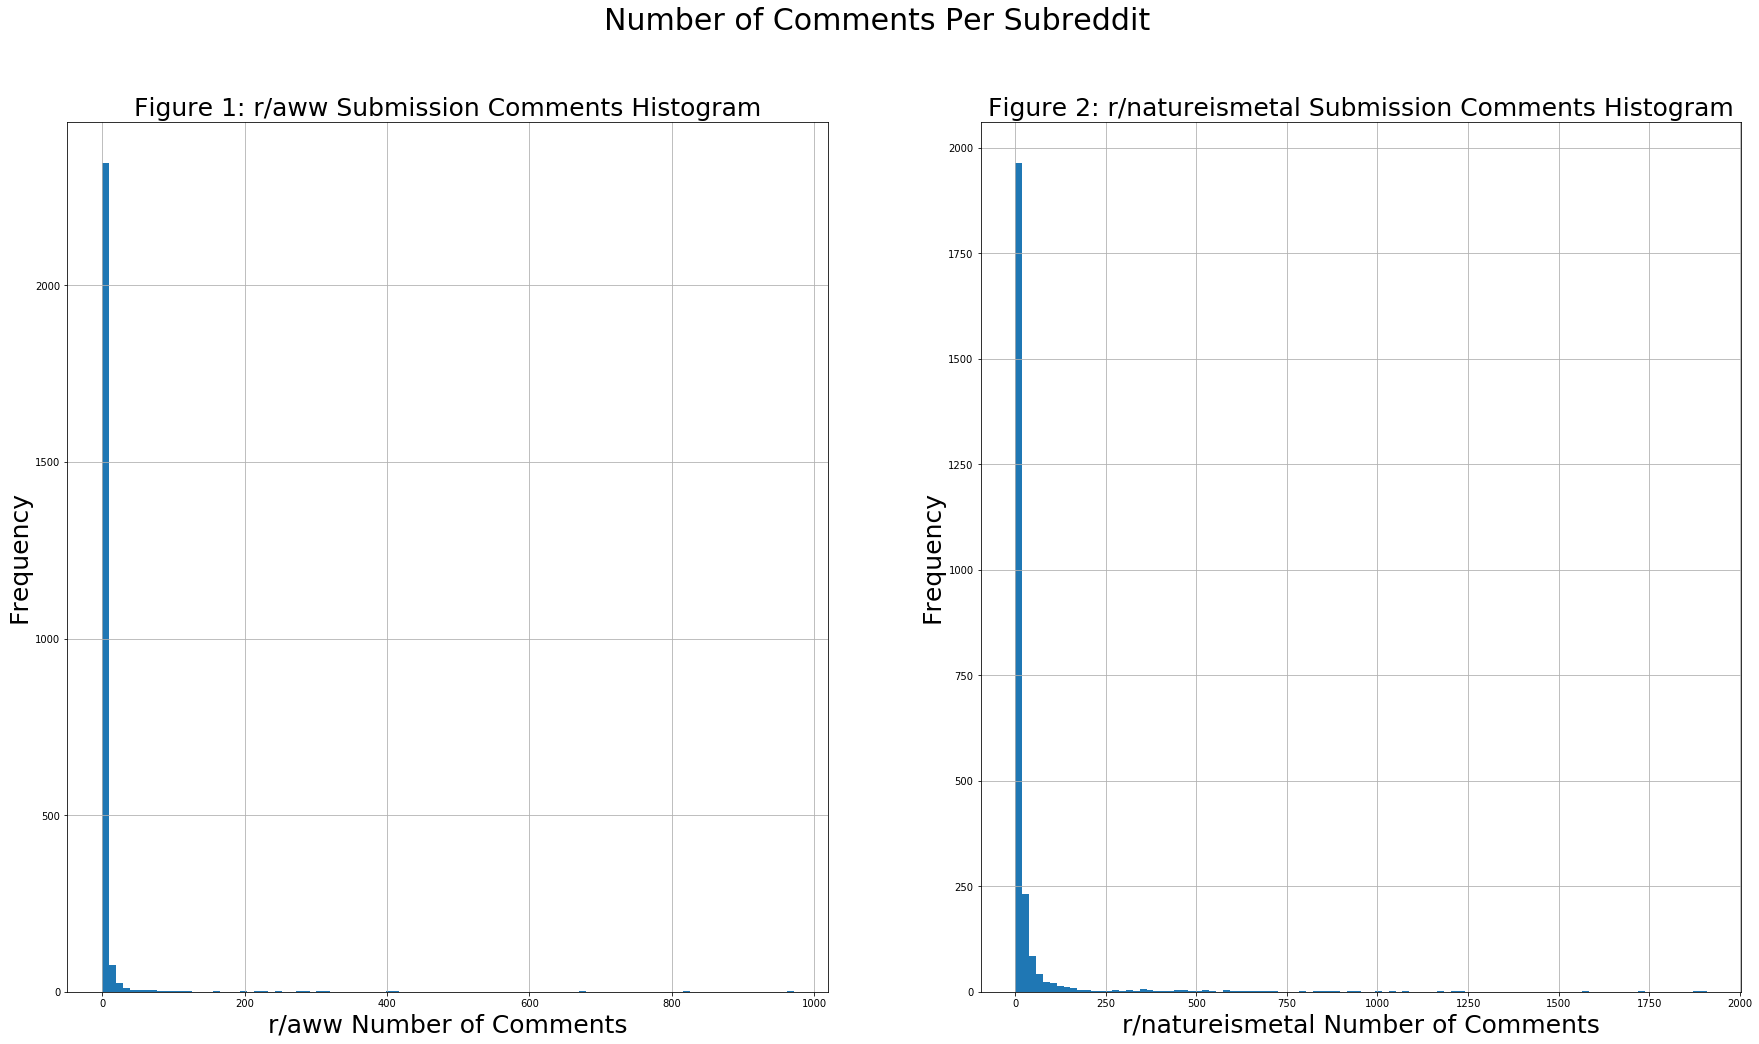

In [98]:
xdcol1 = aww_df['number_of_comments'] #left plot x data
xdcol2 = metal_df['number_of_comments'] #right plot x data

bigtitle = 'Number of Comments Per Subreddit' #superior title
leftx = 'r/aww Number of Comments' #left plot xlabel
lefty = 'Frequency' #left plot ylabel
lefttitle = 'Figure 1: r/aww Submission Comments Histogram' #left plot title
rightx = 'r/natureismetal Number of Comments' #right plot xlabel
righty = 'Frequency' #right plot ylabel
righttitle = 'Figure 2: r/natureismetal Submission Comments Histogram' #right plot title

plot_hists(xdcol1,xdcol2,bigtitle,leftx,lefty,lefttitle,rightx,righty,righttitle) #utilizes function

From the above two figures, a visual decription is shown about what kind of popularity our data is experiencing through the number of comments being made per submission. The distributions are right skewed and showing a high frequency of sumbissions with less than 200 comments, in our data per subreddit. Interestingly, the top comment threshold per subreddit sample is different from one another, where r/aww in Figure 1 seems to show submissions with less comments than r/natureismetal in Figure 2. Fortunately both of the dataframes are of equal shape, which helps us make the visual examinations of how the critical points of frequency change between each graph -- notice how there is a higher frequency of lower commented submissions in Figure 1 than in Figure 2. This is another way to show how our equal sized subreddit comment distributions are being spread out, where Figure 2 has a higher frequency with more commented submissions.    

Let's examine some other unique measures below.  

In [111]:
np.sort(aww_df['score'].unique()) #outputs a sorted display of unique score values

array([1, 2, 3, 7])

In [110]:
 np.sort(metal_df['score'].unique()) #outputs a sorted display of uniqu score values

array([    0,     1,     2,     3,     4,     5,     6,     7,     8,
           9,    10,    11,    12,    13,    14,    15,    16,    17,
          18,    19,    20,    21,    22,    23,    24,    25,    26,
          27,    28,    29,    33,    34,    38,    44,    47,    54,
          57,    62,    63,    64,    66,    69,    72,    76,    77,
          81,    93,    96,    97,   103,   106,   111,   112,   138,
         150,   206,   280,   336,  2004,  4521,  6323, 15133, 40830])

In [117]:
aww_df['total_awards_received'].unique() #shows the unique 

array([0])

In [118]:
metal_df['total_awards_received'].unique()

array([0, 1, 2])

The above outputs of code show the unique score values of each subreddit as well as the number of awards received for each submission post form each reddit. The unique scores found throughout the subreddits are displayed here: 

__Unique Submission Scores for r/aww:__ 1, 2, 3, 7

__Unique Submission Scores for r/natureismetal:__ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 38, 44, 47, 54, 57, 62, 63, 64, 66, 69, 72, 76, 77, 81, 93, 96, 97, 103, 106, 111, 112, 138, 150, 206, 280, 336, 2004, 4521, 6323, 15133, 40830


r/natureismetal has a wider distribution of numeric value scores and has a wider distribution of numeric value comments per submission than r/aww has. r/natureismetal has a maximum score value of 40,0830 points on at least one submission while r/aww has a maximum score value of 7 points on at least one submission. 


It is also noticed that r/aww does not contain any submissions with awards, while r/natureismetal does:

<BarContainer object of 5000 artists>

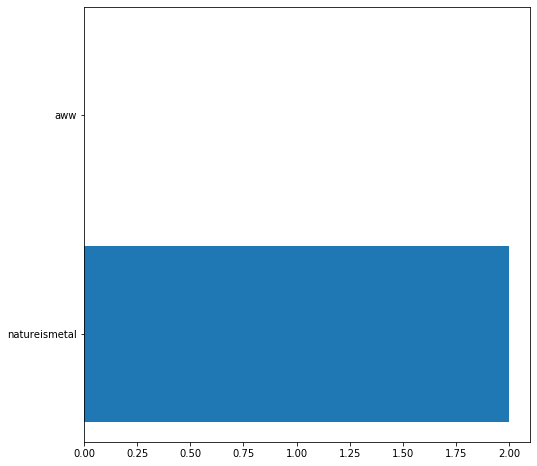

In [123]:
plt.figure(figsize = (8,8))
plt.barh(jumbled_df['subreddit'], jumbled_df['total_awards_received'])

plt.grid()

In [85]:
# Instantiate CountVectorizer for use in EDA
cv = CountVectorizer()

# Fit CountVectorizer to text data.
cv.fit(aww_df['title'])

# Transform data based on the fit CountVectorizer.
X_cv = cv.transform(aww_df['title'])

In [86]:
words = pd.DataFrame(X_cv.todense(), columns=cv.get_feature_names())

In [87]:
words.sum().sort_values(ascending=False).head(20)

my      750
the     617
to      400
and     387
is      386
this    365
of      254
he      237
in      226
she     212
her     201
for     184
cat     183
dog     177
his     168
on      161
you     151
with    135
it      134
me      132
dtype: int64

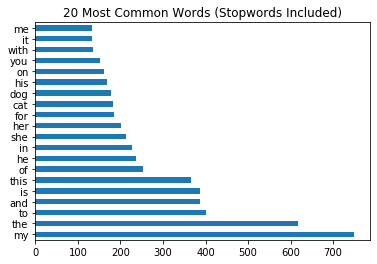

In [88]:
words.sum().sort_values(ascending=False).head(20).plot(kind = 'barh')
plt.title("20 Most Common Words (Stopwords Included)");

In [89]:
# Instantiate CountVectorizer for use in EDA
cv = CountVectorizer()

# Fit CountVectorizer to text data.
cv.fit(metal_df['title'])

# Transform data based on the fit CountVectorizer.
X_cv = cv.transform(metal_df['title'])

In [90]:
words = pd.DataFrame(X_cv.todense(), columns=cv.get_feature_names())

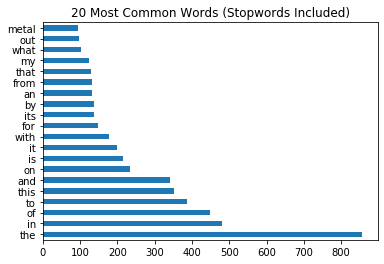

In [91]:
words.sum().sort_values(ascending=False).head(20).plot(kind = 'barh')
plt.title("20 Most Common Words (Stopwords Included)");

## 3.00 Machine Learning Modeling and Visualization

## 4.00 Conclusions

## 5.00 Sources and References